## Input

In [92]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Morga\programsMG\NaturalLanguageProcessing\preprocessed_kindle_review.csv')

 ## Preprocessing

In [93]:
M = df['reviewText'].tolist()
y = df['rating'].tolist()

In [94]:
import re
X=[]
for item in M:
    X.append(re.sub(r'([a-zA-Z0-9_<>-])\1+', r'\1\1', item))

## Vectorization

In [95]:
from nltk.tokenize import word_tokenize 

textdocuments=[]
for item in X:
    x = word_tokenize(item)
    textdocuments.append(x)  

In [96]:
def merge(list1, list2):
    merged_list = [(list1 [i], list2 [i]) for i in range (0, len(list1))]
    return merged_list

In [97]:
documents = merge(textdocuments,y) 

##  Dict for Accuracy and F1 score

In [98]:
final_dict_NLTK = {}
final_dict_Sklearn = {}

## Original bigram mnb model

In [99]:
bigram_featuresets_df = pd.read_csv(r'C:\Users\Morga\programsMG\NaturalLanguageProcessing\bigram_featuresets.csv')

In [100]:
X_bifs=bigram_featuresets_df.drop('class',axis=1)

In [101]:
# import the module
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import numpy as np
# initialize the model
mnb1_bifs = MultinomialNB()

In [102]:
# use the training data to train the model
mnb_model_bifs = mnb1_bifs.fit(X_bifs,y)
#cross validation score
mnb_cv_scores_bifs = cross_val_score(mnb1_bifs, X_bifs, y, cv=10)
#finding the overall average accuracy.
mnb_cv_score_bifs = round(np.mean(mnb_cv_scores_bifs),4)
print(mnb_cv_score_bifs)

0.4946


In [103]:
from sklearn.model_selection import cross_val_predict
# print confusion matrix and classification report
mnb_model_bifs_pred = cross_val_predict(mnb1_bifs, X_bifs, y, cv=10)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, mnb_model_bifs_pred, labels=[1,2,3,4,5])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['1','2','3','4','5']
mnb_model_bifs_report= classification_report(y, mnb_model_bifs_pred, target_names=target_names)
print(mnb_model_bifs_report)

[[1284  447  111   71   87]
 [ 680  743  304  155  118]
 [ 279  394  642  451  234]
 [ 147  163  484 1168 1038]
 [ 125   46  126  605 2098]]

              precision    recall  f1-score   support

           1       0.51      0.64      0.57      2000
           2       0.41      0.37      0.39      2000
           3       0.39      0.32      0.35      2000
           4       0.48      0.39      0.43      3000
           5       0.59      0.70      0.64      3000

    accuracy                           0.49     12000
   macro avg       0.47      0.48      0.48     12000
weighted avg       0.48      0.49      0.49     12000



In [104]:
mnb_model_bifs_f1_1_score= float(mnb_model_bifs_report[94:98])
mnb_model_bifs_f1_2_score = float(mnb_model_bifs_report[148:152])
mnb_model_bifs_f1_3_score = float(mnb_model_bifs_report[202:206])
mnb_model_bifs_f1_4_score = float(mnb_model_bifs_report[256:260])
mnb_model_bifs_f1_5_score = float(mnb_model_bifs_report[310:314])

## Original Ngram mnb model

In [105]:
# initialize the  model
mnb2 = MultinomialNB()

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
ngram_tfidf_vectorizer_mnb = TfidfVectorizer(encoding='latin-1'
                                                 ,ngram_range=(1,2)
                                                 , use_idf=True
                                                 , min_df=5
                                                 , max_features=3000
                                                )

In [107]:
# fitting and transforming the training data using the count vectorizer
X_train_mnb_2 = ngram_tfidf_vectorizer_mnb.fit_transform(X)

In [108]:
# use the training data to train the model
#mnb_model_2 = mnb2.fit(X_train_mnb_2,y)
#cross validation score
mnb_cv_scores_2 = cross_val_score(mnb2, X_train_mnb_2, y, cv=10)
#finding the overall average accuracy.
mnb_cv_score_2 = round(np.mean(mnb_cv_scores_2),4)
print(mnb_cv_score_2)

0.5136


In [109]:
# print confusion matrix and classification report
mnb_ngram_pred = cross_val_predict(mnb2, X_train_mnb_2, y, cv=10)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, mnb_ngram_pred, labels=[1,2,3,4,5])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['1','2','3','4','5']
mnb_ngram_report= classification_report(y, mnb_ngram_pred, target_names=target_names)
print(mnb_ngram_report)

[[1142  447   66  227  118]
 [ 498  807  194  365  136]
 [ 152  371  418  869  190]
 [  47   92  213 1699  949]
 [  47   23   18  815 2097]]

              precision    recall  f1-score   support

           1       0.61      0.57      0.59      2000
           2       0.46      0.40      0.43      2000
           3       0.46      0.21      0.29      2000
           4       0.43      0.57      0.49      3000
           5       0.60      0.70      0.65      3000

    accuracy                           0.51     12000
   macro avg       0.51      0.49      0.49     12000
weighted avg       0.51      0.51      0.50     12000



In [110]:
mnb_model_ngram_f1_1_score= float(mnb_ngram_report[94:98])
mnb_model_ngram_f1_2_score = float(mnb_ngram_report[148:152])
mnb_model_ngram_f1_3_score = float(mnb_ngram_report[202:206])
mnb_model_ngram_f1_4_score = float(mnb_ngram_report[256:260])
mnb_model_ngram_f1_5_score = float(mnb_ngram_report[310:314])

## Adding to dict

In [111]:
final_dict_NLTK['mnb_cv_score_bifs']=mnb_cv_score_bifs
final_dict_NLTK['mnb_model_bifs_f1_1_score']=mnb_model_bifs_f1_1_score
final_dict_NLTK['mnb_model_bifs_f1_2_score']=mnb_model_bifs_f1_2_score
final_dict_NLTK['mnb_model_bifs_f1_3_score']=mnb_model_bifs_f1_3_score
final_dict_NLTK['mnb_model_bifs_f1_4_score']=mnb_model_bifs_f1_4_score
final_dict_NLTK['mnb_model_bifs_f1_5_score']=mnb_model_bifs_f1_5_score

In [112]:
final_dict_Sklearn['mnb_cv_score_2']=mnb_cv_score_2
final_dict_Sklearn['mnb_model_ngram_f1_1_score']=mnb_model_ngram_f1_1_score
final_dict_Sklearn['mnb_model_ngram_f1_2_score']=mnb_model_ngram_f1_2_score
final_dict_Sklearn['mnb_model_ngram_f1_3_score']=mnb_model_ngram_f1_3_score
final_dict_Sklearn['mnb_model_ngram_f1_4_score']=mnb_model_ngram_f1_4_score
final_dict_Sklearn['mnb_model_ngram_f1_5_score']=mnb_model_ngram_f1_5_score

## Vader

In [113]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#setting an empty list to save the compound scores into.
vs_list_compound = [] 
#Looping through to get a compound score for each tweet saving it into the compund list created.
for review in X:
    vs = analyzer.polarity_scores(review)
    vs_list = vs['compound']
    vs_list_compound.append(vs_list) 

In [114]:
import numpy as np
sent_array = np.asarray(vs_list_compound)
sent_norm = (sent_array - sent_array.min())/ (sent_array.max() - sent_array.min())

## subjectivity

In [115]:
SLpath = r"C:\Users\Morga\programsMG\NaturalLanguageProcessing\subjclueslen1-HLTEMNLP05.tff"

In [116]:
# this function returns a dictionary where you can look up words and get back 
#     the four items of subjectivity information described above
def readSubjectivity(path):
    flexicon = open(path, 'r')
    # initialize an empty dictionary
    sldict = { }
    for line in flexicon:
        fields = line.split()   # default is to split on whitespace
        # split each field on the '=' and keep the second part as the value
        strength = fields[0].split("=")[1]
        word = fields[2].split("=")[1]
        posTag = fields[3].split("=")[1]
        stemmed = fields[4].split("=")[1]
        polarity = fields[5].split("=")[1]
        if (stemmed == 'y'):
            isStemmed = True
        else:
            isStemmed = False
        # put a dictionary entry with the word as the keyword
        #     and a list of the other values
        sldict[word] = [strength, posTag, isStemmed, polarity]
    return sldict

In [117]:
# or copy the readSubjectivity function into your session and cal the fn
SL = readSubjectivity(SLpath)

In [118]:
document_words=[]
for (d, c) in documents:
    document_words.append(d)

In [119]:
pos_count = []
neg_count =[]
for review in document_words:
    temp_pos = []
    temp_neg =[]
    for token in review:
        weakPos = 0
        strongPos = 0
        weakNeg = 0
        strongNeg = 0
        if token in SL:
            strength, posTag, isStemmed, polarity = SL[token]
            if strength == 'weaksubj' and polarity == 'positive':
                weakPos += 1
            if strength == 'strongsubj' and polarity == 'positive':
                strongPos += 1
            if strength == 'weaksubj' and polarity == 'negative':
                weakNeg += 1
            if strength == 'strongsubj' and polarity == 'negative':
                strongNeg += 1
            temp_pos.append(weakPos + (2 * strongPos))
            temp_neg.append(weakNeg + (2 * strongNeg))            
    pos_count.append(sum(temp_pos))
    neg_count.append(sum(temp_neg))

In [120]:
import numpy as np
pos_array = np.asarray(pos_count)
pos_norm = (pos_array - pos_array.min())/ (pos_array.max() - pos_array.min())

In [121]:
import numpy as np
neg_array = np.asarray(neg_count)
neg_norm = (neg_array - neg_array.min())/ (neg_array.max() - neg_array.min())

## Negation

In [122]:
import re
def has_negation(post):
    pattern_neg_1 = re.compile(r'\b(not|no|never)\b')
    pattern_neg_2 = re.compile(r'\b([a-z]+less)\b')
    if pattern_neg_1.search(post.lower()) or pattern_neg_2.search(post.lower()):
        return 1
    else: 
        return 0

In [123]:
neg_count=[]
for item in X:
    neg_count.append(has_negation(item))

In [124]:
neg_count_array = np.asarray(neg_count)
neg_count_norm = (neg_count_array - neg_count_array.min())/ (neg_count_array.max() - neg_count_array.min())

## Final Model Creations

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
## Selecting the vectorizer options
ngram_tfidf_vectorizer_mnb = TfidfVectorizer(encoding='latin-1'
                                                 , ngram_range=(1,2)
                                                 , use_idf=True
                                                 , min_df=5
                                                 , max_features=3000
                                            )
#vectorizing and savind the vector
vecs = ngram_tfidf_vectorizer_mnb.fit_transform(X)
# placing the vector into a pandas data frame
vecsdf=pd.DataFrame(vecs.toarray(),
            columns=ngram_tfidf_vectorizer_mnb.get_feature_names_out())

In [126]:
# adding feature set to data frame
vecsdf['sent_2_norm']=sent_norm

In [127]:
# adding feature set to data frame
X_bifs['sent_2_norm']=sent_norm
X_bifs['pos_norm']=pos_norm
X_bifs['neg_norm']=neg_norm

In [128]:
# initializing the model
mnb_bifs_final = MultinomialNB()
#cross validation score
mnb_cv_scores_bifs_final = cross_val_score(mnb_bifs_final, X_bifs, y, cv=10)
#finding the overall average accuracy.
mnb_cv_score_bifs_final = round(np.mean(mnb_cv_scores_bifs_final),4)
print(mnb_cv_score_bifs_final)
# initializing the model
mnb_ngram_final = MultinomialNB()
#cross validation score
mnb_cv_scores_ngram_final = cross_val_score(mnb_ngram_final, vecsdf, y, cv=10)
#finding the overall average accuracy.
mnb_cv_score_ngram_final = round(np.mean(mnb_cv_scores_ngram_final),4)
print(mnb_cv_score_ngram_final)

0.4955
0.5186


In [129]:
# print confusion matrix and classification report
mnb_bifs_final_pred = cross_val_predict(mnb_bifs_final, X_bifs, y, cv=10)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, mnb_bifs_final_pred, labels=[1,2,3,4,5])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['1','2','3','4','5']
mnb_bifs_final_report= classification_report(y, mnb_bifs_final_pred, target_names=target_names)
print(mnb_bifs_final_report)

[[1269  448  114   73   96]
 [ 664  750  309  152  125]
 [ 275  390  639  454  242]
 [ 134  155  484 1160 1067]
 [ 103   42  123  604 2128]]

              precision    recall  f1-score   support

           1       0.52      0.63      0.57      2000
           2       0.42      0.38      0.40      2000
           3       0.38      0.32      0.35      2000
           4       0.47      0.39      0.43      3000
           5       0.58      0.71      0.64      3000

    accuracy                           0.50     12000
   macro avg       0.48      0.49      0.48     12000
weighted avg       0.48      0.50      0.49     12000



In [130]:
mnb_bifs_final_f1_1_score = float(mnb_bifs_final_report[94:98])
mnb_bifs_final_f1_2_score = float(mnb_bifs_final_report[148:152])
mnb_bifs_final_f1_3_score = float(mnb_bifs_final_report[202:206])
mnb_bifs_final_f1_4_score = float(mnb_bifs_final_report[256:260])
mnb_bifs_final_f1_5_score = float(mnb_bifs_final_report[310:314])

In [131]:
# print confusion matrix and classification report
mnb_ngram_final_pred = cross_val_predict(mnb_ngram_final, vecsdf, y, cv=10)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y, mnb_ngram_final_pred, labels=[1,2,3,4,5])
print(cm)
print()

from sklearn.metrics import classification_report
target_names = ['1','2','3','4','5']
mnb_ngram_final_report= classification_report(y, mnb_ngram_final_pred, target_names=target_names)
print(mnb_ngram_final_report)

[[1143  459   72  210  116]
 [ 482  815  216  360  127]
 [ 130  359  432  880  199]
 [  37   88  197 1710  968]
 [  40   17   18  802 2123]]

              precision    recall  f1-score   support

           1       0.62      0.57      0.60      2000
           2       0.47      0.41      0.44      2000
           3       0.46      0.22      0.29      2000
           4       0.43      0.57      0.49      3000
           5       0.60      0.71      0.65      3000

    accuracy                           0.52     12000
   macro avg       0.52      0.49      0.49     12000
weighted avg       0.52      0.52      0.51     12000



In [132]:
mnb_ngram_final_f1_1_score = float(mnb_ngram_final_report[94:98])
mnb_ngram_final_f1_2_score = float(mnb_ngram_final_report[148:152])
mnb_ngram_final_f1_3_score = float(mnb_ngram_final_report[202:206])
mnb_ngram_final_f1_4_score = float(mnb_ngram_final_report[256:260])
mnb_ngram_final_f1_5_score = float(mnb_ngram_final_report[310:314])

## Adding to dict

In [133]:
final_dict_NLTK['mnb_cv_score_bifs_final']=mnb_cv_score_bifs_final
final_dict_NLTK['mnb_bifs_final_f1_1_score']=mnb_bifs_final_f1_1_score
final_dict_NLTK['mnb_bifs_final_f1_2_score']=mnb_bifs_final_f1_2_score
final_dict_NLTK['mnb_bifs_final_f1_3_score']=mnb_bifs_final_f1_3_score
final_dict_NLTK['mnb_bifs_final_f1_4_score']=mnb_bifs_final_f1_4_score
final_dict_NLTK['mnb_bifs_final_f1_5_score']=mnb_bifs_final_f1_5_score

In [134]:
final_dict_Sklearn['mnb_cv_score_ngram_final']=mnb_cv_score_ngram_final
final_dict_Sklearn['mnb_ngram_final_f1_1_score']=mnb_ngram_final_f1_1_score
final_dict_Sklearn['mnb_ngram_final_f1_2_score']=mnb_ngram_final_f1_2_score
final_dict_Sklearn['mnb_ngram_final_f1_3_score']=mnb_ngram_final_f1_3_score
final_dict_Sklearn['mnb_ngram_final_f1_4_score']=mnb_ngram_final_f1_4_score
final_dict_Sklearn['mnb_ngram_final_f1_5_score']=mnb_ngram_final_f1_5_score

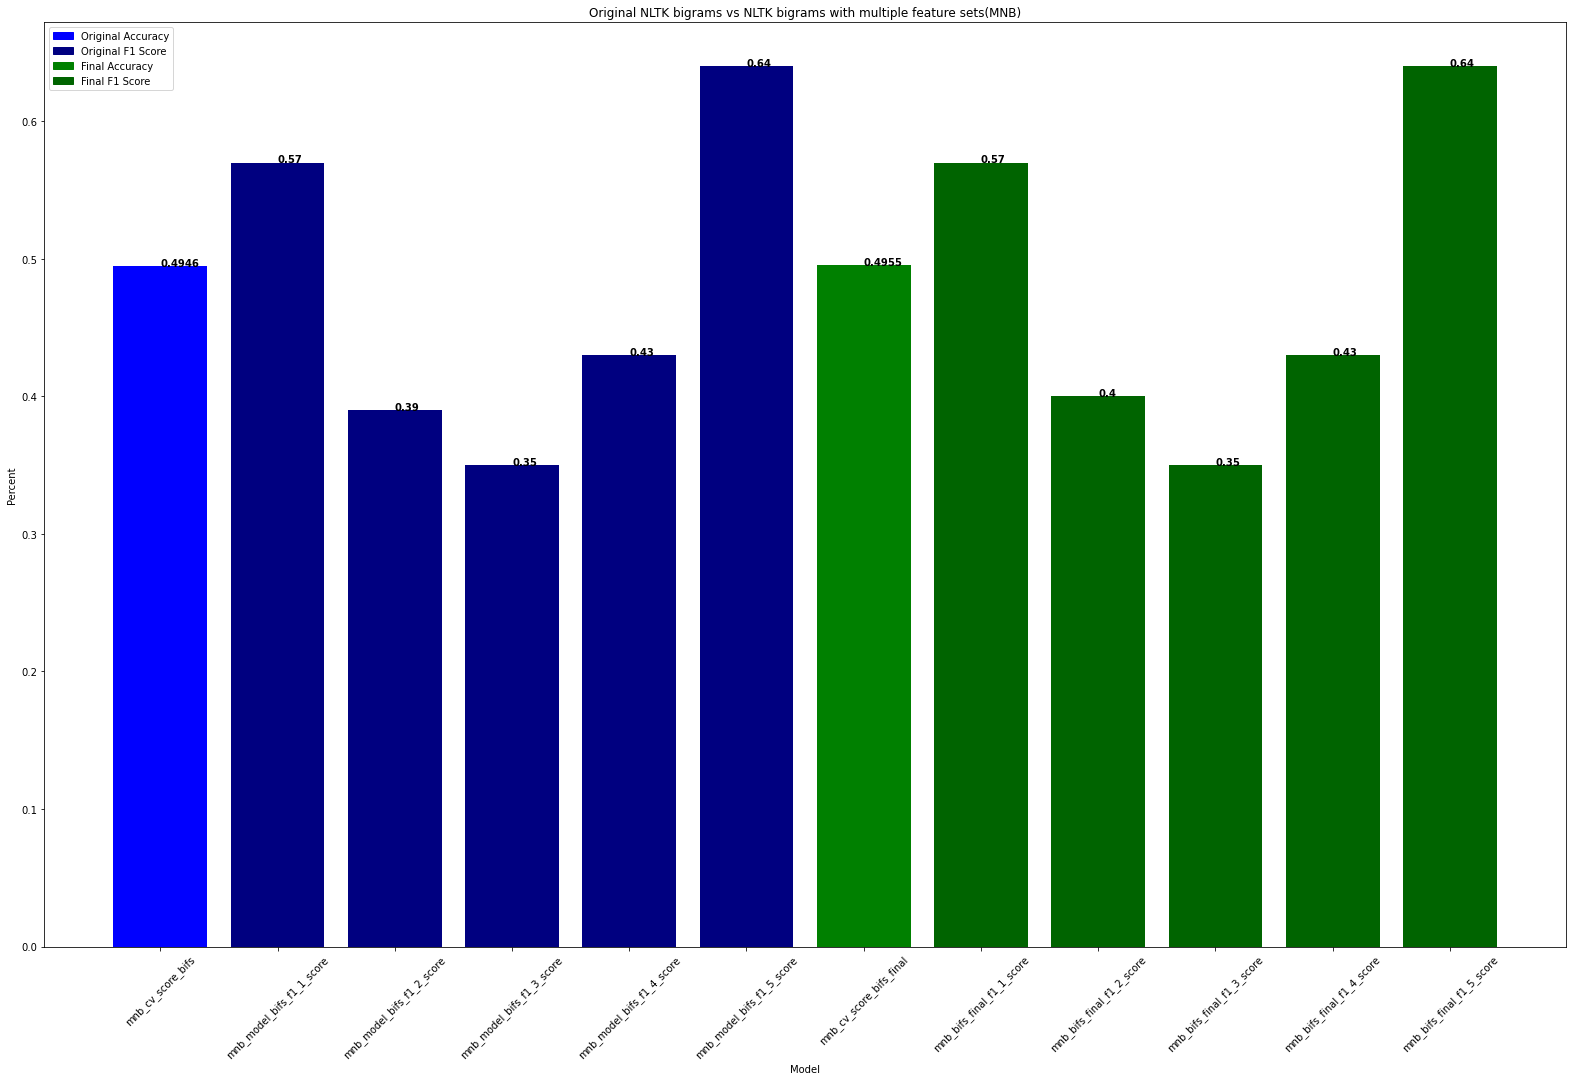

In [135]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(final_dict_NLTK.values())
names = list(final_dict_NLTK.keys())
colors = ['blue','navy','navy','navy','navy','navy'
          ,'green','darkgreen','darkgreen','darkgreen','darkgreen','darkgreen'
]
plt.figure(figsize=(60, 17))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )
plt.xticks(rotation= 45)
#plt.show()
# legend manually added
l1 = mpatches.Patch(color='blue', label='Original Accuracy')
l2 = mpatches.Patch(color='navy', label='Original F1 Score')
l3 = mpatches.Patch(color='green', label='Final Accuracy')
l4 = mpatches.Patch(color='darkgreen', label='Final F1 Score')


plt.ylabel('Percent')
plt.xlabel('Model')
plt.title('Original NLTK bigrams vs NLTK bigrams with multiple feature sets(MNB)')

addlabels(values)
plt.legend(handles=[l1, l2, l3,l4], loc=0)
plt.show()

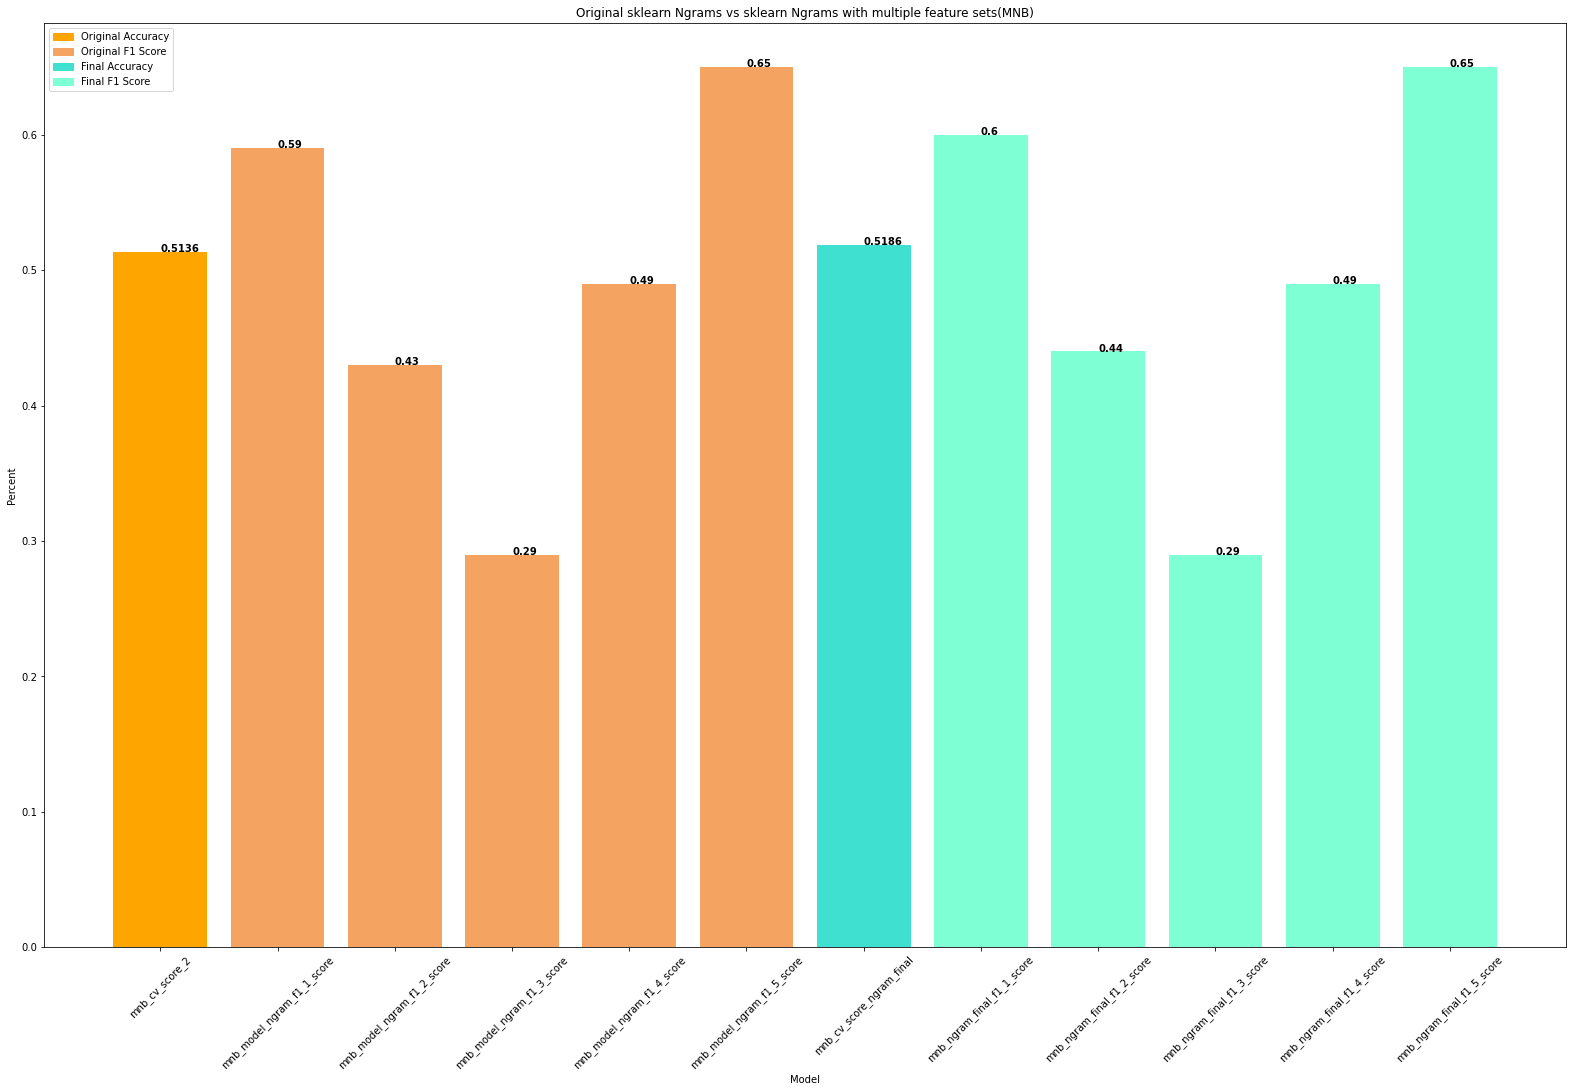

In [136]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(final_dict_Sklearn.values())
names = list(final_dict_Sklearn.keys())
colors = ['orange','sandybrown','sandybrown','sandybrown','sandybrown','sandybrown'
          ,'turquoise','aquamarine','aquamarine','aquamarine','aquamarine','aquamarine'
]
plt.figure(figsize=(60, 17))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )
plt.xticks(rotation= 45)
#plt.show()
# legend manually added
l1 = mpatches.Patch(color='orange', label='Original Accuracy')
l2 = mpatches.Patch(color='sandybrown', label='Original F1 Score')
l3 = mpatches.Patch(color='turquoise', label='Final Accuracy')
l4 = mpatches.Patch(color='aquamarine', label='Final F1 Score')


plt.ylabel('Percent')
plt.xlabel('Model')
plt.title('Original sklearn Ngrams vs sklearn Ngrams with multiple feature sets(MNB)')

addlabels(values)
plt.legend(handles=[l1, l2, l3,l4], loc=2)
plt.show()